In [2]:
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## Load COPX Data

In [3]:
copx = yf.Ticker("COPX").history(period="max", interval="1d").reset_index()# yf.Ticker("COPX").history(period="1y", interval="1h")
copx = copx.drop(columns=['Dividends', 'Stock Splits', 'Capital Gains'])
copx['Date'] = pd.to_datetime(copx['Date'].dt.date)
copx = copx.sort_values(by='Date')
copx.head(3)

,Date,Open,High,Low,Close,Volume
0,2010-04-20,33.153594,33.153594,32.597325,32.664078,1933
1,2010-04-21,32.486071,32.708578,32.063307,32.152309,2900
2,2010-04-22,32.018808,32.018808,31.529292,31.974308,3600


## Feature Engineering

In [4]:

# High and Low as a percentage of Open
copx['High/Open(%)'] = copx['High']/ copx['Open']
copx['Low/Open(%)'] = copx['Low'] / copx['Open']

# Daily return based on Close
copx['Daily Return'] = copx['Close'].pct_change()  

# Date features
copx['Day of Week'] = copx['Date'].dt.day_name()
copx['Month'] = copx['Date'].dt.month
copx['Year'] = copx['Date'].dt.year

# Lag features
LAGS_DAY = [1, 2, 3, 4, 5, 10, 15, 20]
for LAG_DAY in LAGS_DAY:
    copx[f'High/Open(%) [{LAG_DAY} day]'] = copx['High/Open(%)'].shift(LAG_DAY)
    copx[f'Low/Open(%) [{LAG_DAY} day]'] = copx['Low/Open(%)'].shift(LAG_DAY)

# Moving Averages
copx['MA5'] = copx['Close'].shift(1).rolling(window = 5).mean()
copx['MA10'] = copx['Close'].shift(1).rolling(window = 10).mean()
copx['MA20'] = copx['Close'].shift(1).rolling(window = 20).mean()
copx['MA100'] = copx['Close'].shift(1).rolling(window = 100).mean()


copx = copx.dropna().reset_index()

starting_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
for col in starting_cols:
    copx[f'Prev{col}'] = copx[col].shift(1)

### Using other ETFs

- First Quantum Minerals Ltd. (FM.TO)
- Lundin Mining Corporation (LUN.TO)
- Capstone Copper Corp. (CS.TO)
- Boliden AB (BOL.ST)
- Ivanhoe Mines Ltd. (IVN.TO)
- Glencore plc (GLEN.L)
- Southern Copper Corporation (SCCO)
- Teck Resources Limited (TECK.B.TO)
- Freeport-McMoRan Inc. (FCX)
- BHP Group Limited (BHP.AX)

In [5]:
tickers = ['FM.TO', 'LUN.TO', 'CS.TO', 'BOL.ST', 'IVN.TO'] 
LAG_DAYS = [1, 2, 3, 4, 5]
for ticker in tickers:
    data =  yf.Ticker(ticker).history(period="max", interval="1d").reset_index()
    data['Date'] = pd.to_datetime(data['Date'].dt.date)
    data = data.sort_values(by='Date')
    for LAG_DAY in LAG_DAYS:
        feature1 = f'{ticker} Daily Return [{LAG_DAY} day]'
        feature2 = f'{ticker} High/Open(%) [{LAG_DAY} day]'
        data[feature1] = data['Close'].pct_change().shift(LAG_DAY)
        data[feature2] = (data['High'] / data['Open']).shift(LAG_DAY)
        
        features = data[['Date', feature1, feature2]]
        copx = pd.merge(copx, features, on='Date', how='left')
        
copx

,index,Date,Open,High,Low,Close,Volume,High/Open(%),Low/Open(%),Daily Return,...,IVN.TO Daily Return [1 day],IVN.TO High/Open(%) [1 day],IVN.TO Daily Return [2 day],IVN.TO High/Open(%) [2 day],IVN.TO Daily Return [3 day],IVN.TO High/Open(%) [3 day],IVN.TO Daily Return [4 day],IVN.TO High/Open(%) [4 day],IVN.TO Daily Return [5 day],IVN.TO High/Open(%) [5 day]
0,100,2010-09-10,30.372253,30.461255,30.216498,30.439005,3733,1.002930,0.994872,0.005143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,101,2010-09-13,31.084275,31.640543,31.017522,31.640543,3133,1.017895,0.997853,0.039474,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,102,2010-09-14,31.351287,32.041060,31.351287,31.707298,4133,1.022001,1.000000,0.002110,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,103,2010-09-15,31.596043,31.751801,31.573794,31.707298,1500,1.004930,0.999296,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,104,2010-09-16,31.751793,31.863045,31.685040,31.863045,2867,1.003504,0.997898,0.004912,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3579,3679,2024-11-29,41.869999,42.630001,41.869999,42.630001,1278900,1.018151,1.000000,0.010669,...,-0.005339,1.001607,0.001604,1.020256,-0.020430,1.000000,0.000000,1.015026,-0.010881,1.001562
3580,3680,2024-12-02,42.320000,42.660000,41.919998,42.340000,1323700,1.008034,0.990548,-0.006803,...,0.011809,1.020845,-0.005339,1.001607,0.001604,1.020256,-0.020430,1.000000,0.000000,1.015026
3581,3681,2024-12-03,43.090000,43.349998,42.529999,42.740002,1190100,1.006034,0.987004,0.009447,...,-0.007427,1.002110,0.011809,1.020845,-0.005339,1.001607,0.001604,1.020256,-0.020430,1.000000
3582,3682,2024-12-04,42.720001,42.919998,42.360001,42.500000,873600,1.004682,0.991573,-0.005615,...,0.044896,1.019231,-0.007427,1.002110,0.011809,1.020845,-0.005339,1.001607,0.001604,1.020256


## Baseline

### Baseline - buy and hold

Buy at the very first open, sell at the most recent close.

In [6]:
copx_baseline = yf.Ticker("COPX").history(period="max", interval="1d").reset_index()
copx_baseline = copx_baseline.drop(columns=['Dividends', 'Stock Splits', 'Capital Gains'])
copx_baseline['Date'] = pd.to_datetime(copx_baseline['Date'].dt.date)
copx_baseline = copx_baseline.sort_values(by='Date')
copx_baseline = copx_baseline.dropna().reset_index()
copx_baseline = copx_baseline.drop(columns=['index'])

In [7]:
principal = 100 # Starting dollars

buy_price = copx_baseline['Open'].iloc[0]
sell_price = copx_baseline['Close'].iloc[-1]

total_value = principal / buy_price * sell_price
profit_and_loss_percentage = (total_value - principal) / principal
profit_and_loss_percentage_formatted = f'{round(profit_and_loss_percentage, 4) * 100}%'
profit_and_loss_percentage_formatted

'28.95%'

### Baseline - buy daily, simple take profit threshold

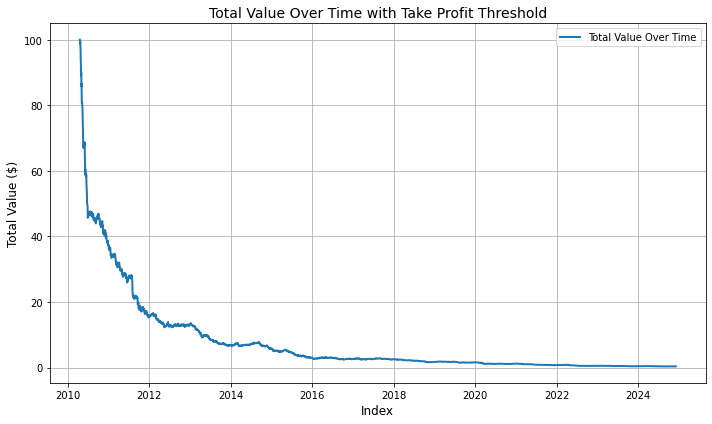

,Date,Open,High,Low,Close,Volume,Value Sold Per Stock,Total Value
0,2010-04-20,33.153590,33.153590,32.597322,32.664074,1933,32.664074,100
1,2010-04-21,32.486067,32.708574,32.063303,32.152306,2900,32.152306,98.972601
2,2010-04-22,32.018800,32.018800,31.529284,31.974300,3600,31.974300,98.835049
3,2010-04-23,31.863053,32.085560,31.707299,32.085560,1100,32.085560,99.525236
4,2010-04-26,33.287099,33.287099,32.041058,32.575073,3600,32.575073,97.396348
...,...,...,...,...,...,...,...,...
3679,2024-11-29,41.869999,42.630001,41.869999,42.630001,1278900,42.288699,0.35399
3680,2024-12-02,42.320000,42.660000,41.919998,42.340000,1323700,42.340000,0.354157
3681,2024-12-03,43.090000,43.349998,42.529999,42.740002,1190100,42.740002,0.35128
3682,2024-12-04,42.720001,42.919998,42.360001,42.500000,873600,42.500000,0.349471


In [8]:
principal = 100 # Starting dollars
take_profit_threshold = 1.01 # Can change

'''
stop_loss_threshold = 0.80 # Can change
def get_profit_loss(row):
    take_profit = row['Open'] * take_profit_threshold
    stop_loss = row['Open'] * stop_loss_threshold
    if row['Low'] <= stop_loss:
        return stop_loss
    if row['High'] >= take_profit:
        return take_profit
    
    return row['Close']
'''

# No stop loss, only take profit
def get_profit_loss(row):
    take_profit = row['Open'] * take_profit_threshold
    if row['High'] >= take_profit:
        return take_profit
    
    return row['Close']

copx_baseline['Value Sold Per Stock'] = copx_baseline.apply(get_profit_loss, axis=1)

copx_baseline['Total Value'] = None
for i in range(len(copx_baseline)):
    if i == 0:
        # The first row's Stock Value is the principal
        copx_baseline.loc[i, 'Total Value'] = principal
    else:
        # Calculate current row's Stock Value
        n_stocks = copx_baseline.loc[i - 1, 'Total Value'] / copx_baseline.loc[i, 'Open']
        copx_baseline.loc[i, 'Total Value'] = (
            n_stocks * copx_baseline.loc[i, 'Value Sold Per Stock']
        )

plt.figure(figsize=(10, 6))
plt.plot(copx_baseline['Date'].values, copx_baseline['Total Value'].values, label='Total Value Over Time', linewidth=2)

plt.title('Total Value Over Time with Take Profit Threshold', fontsize=14)
plt.xlabel('Index', fontsize=12)
plt.ylabel('Total Value ($)', fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

copx_baseline

In [9]:
sum(copx_baseline['Close'] - copx_baseline['Open']) # Close is often lower than Open

-117.29183783850951

# Model

Predict High/Open(%)

Train: 70%, Test: 30%

Features: ['Day of Week',
 'Month',
 'Year',
 'High/Open(%) [1 day]',
 'Low/Open(%) [1 day]',
 'High/Open(%) [2 day]',
 'Low/Open(%) [2 day]',
 'High/Open(%) [3 day]',
 'Low/Open(%) [3 day]',
 'High/Open(%) [4 day]',
 'Low/Open(%) [4 day]',
 'High/Open(%) [5 day]',
 'Low/Open(%) [5 day]',
 'High/Open(%) [10 day]',
 'Low/Open(%) [10 day]',
 'High/Open(%) [15 day]',
 'Low/Open(%) [15 day]',
 'High/Open(%) [20 day]',
 'Low/Open(%) [20 day]',
 'MA5',
 'MA10',
 'MA20',
 'MA100',
 'PrevOpen',
 'PrevHigh',
 'PrevLow',
 'PrevClose',
 'PrevVolume',
 'FM.TO Daily Return [1 day]',
 'FM.TO High/Open(%) [1 day]',
 'FM.TO Daily Return [2 day]',
 'FM.TO High/Open(%) [2 day]',
 'FM.TO Daily Return [3 day]',
 'FM.TO High/Open(%) [3 day]',
 'FM.TO Daily Return [4 day]',
 'FM.TO High/Open(%) [4 day]',
 'FM.TO Daily Return [5 day]',
 'FM.TO High/Open(%) [5 day]',
 'LUN.TO Daily Return [1 day]',
 'LUN.TO High/Open(%) [1 day]',
 'LUN.TO Daily Return [2 day]',
 'LUN.TO High/Open(%) [2 day]',
 'LUN.TO Daily Return [3 day]',
 'LUN.TO High/Open(%) [3 day]',
 'LUN.TO Daily Return [4 day]',
 'LUN.TO High/Open(%) [4 day]',
 'LUN.TO Daily Return [5 day]',
 'LUN.TO High/Open(%) [5 day]',
 'CS.TO Daily Return [1 day]',
 'CS.TO High/Open(%) [1 day]',
 'CS.TO Daily Return [2 day]',
 'CS.TO High/Open(%) [2 day]',
 'CS.TO Daily Return [3 day]',
 'CS.TO High/Open(%) [3 day]',
 'CS.TO Daily Return [4 day]',
 'CS.TO High/Open(%) [4 day]',
 'CS.TO Daily Return [5 day]',
 'CS.TO High/Open(%) [5 day]',
 'BOL.ST Daily Return [1 day]',
 'BOL.ST High/Open(%) [1 day]',
 'BOL.ST Daily Return [2 day]',
 'BOL.ST High/Open(%) [2 day]',
 'BOL.ST Daily Return [3 day]',
 'BOL.ST High/Open(%) [3 day]',
 'BOL.ST Daily Return [4 day]',
 'BOL.ST High/Open(%) [4 day]',
 'BOL.ST Daily Return [5 day]',
 'BOL.ST High/Open(%) [5 day]',
 'IVN.TO Daily Return [1 day]',
 'IVN.TO High/Open(%) [1 day]',
 'IVN.TO Daily Return [2 day]',
 'IVN.TO High/Open(%) [2 day]',
 'IVN.TO Daily Return [3 day]',
 'IVN.TO High/Open(%) [3 day]',
 'IVN.TO Daily Return [4 day]',
 'IVN.TO High/Open(%) [4 day]',
 'IVN.TO Daily Return [5 day]',
 'IVN.TO High/Open(%) [5 day]']

In [ ]:
from sklearn.model_selection import train_test_split

# We want to predict `High/Open(%)` 
target = 'High/Open(%)'
cols_to_ignore = [target, 'Date', 'index', 'Low/Open(%)', 'Daily Return'] + starting_cols
features = [col for col in copx.columns if col not in cols_to_ignore]

# Drop all rows with missing values 
copx = copx.dropna() 

X = copx[features]
y = copx[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

features

['Day of Week',
 'Month',
 'Year',
 'High/Open(%) [1 day]',
 'Low/Open(%) [1 day]',
 'High/Open(%) [2 day]',
 'Low/Open(%) [2 day]',
 'High/Open(%) [3 day]',
 'Low/Open(%) [3 day]',
 'High/Open(%) [4 day]',
 'Low/Open(%) [4 day]',
 'High/Open(%) [5 day]',
 'Low/Open(%) [5 day]',
 'High/Open(%) [10 day]',
 'Low/Open(%) [10 day]',
 'High/Open(%) [15 day]',
 'Low/Open(%) [15 day]',
 'High/Open(%) [20 day]',
 'Low/Open(%) [20 day]',
 'MA5',
 'MA10',
 'MA20',
 'MA100',
 'PrevOpen',
 'PrevHigh',
 'PrevLow',
 'PrevClose',
 'PrevVolume',
 'FM.TO Daily Return [1 day]',
 'FM.TO High/Open(%) [1 day]',
 'FM.TO Daily Return [2 day]',
 'FM.TO High/Open(%) [2 day]',
 'FM.TO Daily Return [3 day]',
 'FM.TO High/Open(%) [3 day]',
 'FM.TO Daily Return [4 day]',
 'FM.TO High/Open(%) [4 day]',
 'FM.TO Daily Return [5 day]',
 'FM.TO High/Open(%) [5 day]',
 'LUN.TO Daily Return [1 day]',
 'LUN.TO High/Open(%) [1 day]',
 'LUN.TO Daily Return [2 day]',
 'LUN.TO High/Open(%) [2 day]',
 'LUN.TO Daily Return [3 d

### Random Forest Regression (Ester)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

## EDA

OptionError: "No such keys(s): 'mode.use_inf_as_null'"

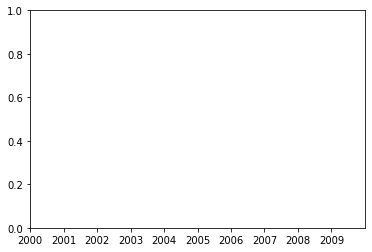

In [13]:
sns.lineplot(data=copx, x="Date", y="Close")
plt.show()

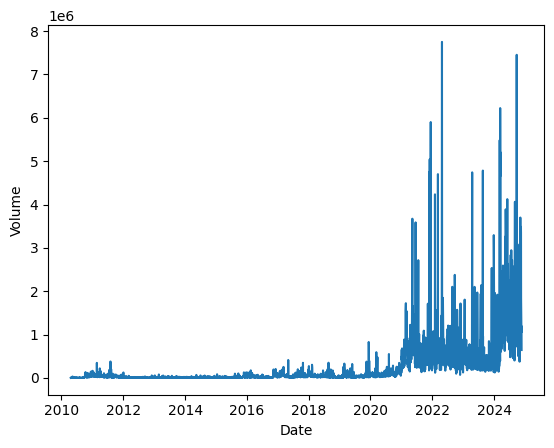

In [ ]:
sns.lineplot(data=copx, x="Date", y="Volume")
plt.show()